In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
df_data = pd.read_csv(open("DXYNews.csv", encoding='utf8'), sep=',',dtype=str)
df_data = df_data.sort_values(by='pubDate')    # 按时间从前向后排列，以便使每天后面的数据可以覆盖前面的数据

In [3]:
df_data.head()

,_id,id,pubDate,title,summary,infoSource,sourceUrl,provinceId,createTime,modifyTime,entryWay,adoptType,infoType,dataInfoState,dataInfoOperator,dataInfoTime,crawlTime,provinceName,body
2541,5e284bff4a3008b8ec9d857f,1,2019-12-31 13:38:05,武汉发现 27 例肺炎病例,近期部分医疗机构发现接诊的多例肺炎病例与华南海鲜城有关联。目前已发现 27 例病例，其中 7...,武汉市卫健委,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,42,2020-01-20 12:00:00,2020-01-20 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22 21:19:46.465,湖北省,NaN
2540,5e284bff4a3008b8ec9d857e,2,2020-01-03 17:00:42,武汉共发现病毒性肺炎诊断患者 44 例,截止 8 时，共发现符合不明原因的病毒性肺炎诊断患者 44 例，其中重症 11 例，其余患者...,武汉市卫健委,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,42,2020-01-20 12:00:00,2020-01-20 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22 21:19:46.465,湖北省,NaN
2539,5e284bff4a3008b8ec9d857d,3,2020-01-05 20:33:24,武汉共发现病毒性肺炎诊断患者 59 例,截止 8 时，共报告符合不明原因的病毒性肺炎诊断患者 59 例，其中重症患者 7 例，其余患...,武汉市卫健委,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,42,2020-01-20 12:00:01,2020-01-20 12:00:01,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22 21:19:46.465,湖北省,NaN
2538,5e284bff4a3008b8ec9d857c,4,2020-01-11 07:04:11,武汉初步诊断有新型冠状病毒感染的肺炎病例 41 例,其中已出院 2 例、重症 7 例、死亡 1 例，其余患者病情稳定。所有密切接触者 739 人...,武汉市卫健委,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,42,2020-01-20 12:00:02,2020-01-20 12:00:02,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22 21:19:46.465,湖北省,NaN
2537,5e284bfe4a3008b8ec9d857b,5,2020-01-12 20:10:13,武汉 11 日无新增新型冠状病毒感染的肺炎病例,累计报告新型冠状病毒感染的肺炎病例 41 例，已治愈出院 6 例，在治重症7例，死亡1例，其...,武汉市卫健委,http://wjw.wuhan.gov.cn/front/web/showDetail/2...,42,2020-01-20 12:00:03,2020-01-20 12:00:03,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-22 21:19:46.465,湖北省,NaN


In [4]:
df_data.tail()

,_id,id,pubDate,title,summary,infoSource,sourceUrl,provinceId,createTime,modifyTime,entryWay,adoptType,infoType,dataInfoState,dataInfoOperator,dataInfoTime,crawlTime,provinceName,body
4,5e6ee4d6070a3af69426380c,10069,2020-03-16 09:58:00,More coronavirus cases outside of mainland Chi...,There have now been more cases of the novel co...,CNN,https://twitter.com/DingXiangDoctor/status/123...,NaN,2020-03-16 10:11:41,2020-03-16 10:11:41,0.0,0.0,2.0,0.0,NaN,2020-03-16 10:11:41,2020-03-16 10:25:23.050,NaN,NaN
3,5e6ee4d6070a3af69426380b,10070,2020-03-16 10:04:00,"US coronavirus cases now above 3,400, death to...","There are at least 3,482 cases of the novel co...",CNN,https://twitter.com/DingXiangDoctor/status/123...,NaN,2020-03-16 10:20:19,2020-03-16 10:20:19,0.0,0.0,2.0,0.0,NaN,2020-03-16 10:20:19,2020-03-16 10:25:23.050,NaN,NaN
2,5e6ef498070a3af694263834,10077,2020-03-16 10:44:00,Guatemala announces first coronavirus death,An 85-year-old man with pre-existing health is...,CNN,https://twitter.com/DingXiangDoctor/status/123...,NaN,2020-03-16 11:09:04,2020-03-16 11:09:04,0.0,0.0,2.0,0.0,NaN,2020-03-16 11:09:04,2020-03-16 11:14:44.634,NaN,NaN
1,5e6ef498070a3af694263833,10078,2020-03-16 10:56:00,More than half of coronavirus cases in France ...,More than half of France's 300 coronavirus pat...,CNN,https://twitter.com/DingXiangDoctor/status/123...,NaN,2020-03-16 11:09:45,2020-03-16 11:09:45,0.0,0.0,2.0,0.0,NaN,2020-03-16 11:09:45,2020-03-16 11:14:44.634,NaN,NaN
0,5e6eff4b9187cd35d7ea8a0b,10087,2020-03-16 12:14:00,"Peru closes borders, orders mandatory self-qua...",Peruvian President Martin Vizcarra issued a na...,CNN,https://twitter.com/DXDoctor_/status/123940503...,NaN,2020-03-16 12:22:33,2020-03-16 12:22:33,0.0,0.0,2.0,0.0,NaN,2020-03-16 12:22:33,2020-03-16 12:23:31.982,NaN,NaN


In [5]:
id = df_data['id']
pubDate = df_data['pubDate']
title = df_data['title']
provinceName = df_data['provinceName']

In [6]:
addition_pattern = '新增.*?\\d.{0,4}例'
accumulation_pattern = '累计.*?\\d{2,}.*?例'

hubei_date_addition_dict = {} # 湖北每日新增字典
hubei_date_accumulation_dict = {}  # 湖北每日累计字典
nation_date_addition_dict = {}  # 全国每日新增字典
nation_date_accumulation_dict = {}  # 全国每日累计字典
shanghai_date_addition_dict = {}  # 上海每日新增字典
shanghai_date_accumulation_dict = {}  # 上海每日累计字典

for i, val in enumerate(id):
    if provinceName.iloc[i] == '湖北省':
        print(id.iloc[i] + " " + provinceName.iloc[i] + " " + pubDate.iloc[i] + " " + title.iloc[i])
        # 湖北新增
        addition_title_group = re.findall(addition_pattern, title.iloc[i])
        if addition_title_group:
            for addition_title in addition_title_group:
                if all(s not in addition_title for s in ['出院', '治愈', '死亡']) and \
                        all(s not in title.iloc[i] for s in ['外', '襄阳']):
                    addition_num = (num if (num := re.search('\\d+', addition_title).group()) is not None else 0)
                    hubei_date_addition_dict[pubDate.iloc[i].split(" ")[0]] = addition_num
        # 湖北累计
        accumulation_title_group = re.findall(accumulation_pattern, title.iloc[i])
        if accumulation_title_group:
            for accumulation_title in accumulation_title_group:
                if all(s not in accumulation_title for s in ['出院', '治愈','死亡']) and ('国' not in title.iloc[i]):
                    accumulation_num = (num if (num := re.search('\\d+', accumulation_title).group()) is not None else 0)
                    hubei_date_accumulation_dict[pubDate.iloc[i].split(" ")[0]] = accumulation_num

    if provinceName.iloc[i] == '全国':
        print(id.iloc[i] + " " + provinceName.iloc[i] + " " + pubDate.iloc[i] + " " + title.iloc[i])
        # 全国新增
        addition_title_group = re.findall(addition_pattern, title.iloc[i])
        if addition_title_group:
            for addition_title in addition_title_group:
                if all(s not in addition_title for s in ['出院', '治愈', '死亡']) and ('外' not in title.iloc[i]):
                    addition_num = (num if (num := re.search('\\d+', addition_title).group()) is not None else 0)
                    nation_date_addition_dict[pubDate.iloc[i].split(" ")[0]] = addition_num
        # 全国累计
        accumulation_title_group = re.findall(accumulation_pattern, title.iloc[i])
        if accumulation_title_group:
            for accumulation_title in accumulation_title_group:
                if all(s not in accumulation_title for s in ['出院', '治愈', '死亡']) and \
                        all(s not in title.iloc[i] for s in ['境外', '韩国']):
                    accumulation_num = (num if (num := re.search('\\d+', accumulation_title).group()) is not None else 0)
                    nation_date_accumulation_dict[pubDate.iloc[i].split(" ")[0]] = accumulation_num

    if provinceName.iloc[i] == '上海市':
        print(id.iloc[i] + " " + provinceName.iloc[i] + " " + pubDate.iloc[i] + " " + title.iloc[i])
        # 上海新增
        addition_title_group = re.findall(addition_pattern, title.iloc[i])
        if addition_title_group:
            for addition_title in addition_title_group:
                if all(s not in addition_title for s in ['出院', '治愈', '死亡']):
                    addition_num = (num if (num := re.search('\\d+', addition_title).group()) is not None else 0)
                    shanghai_date_addition_dict[pubDate.iloc[i].split(" ")[0]] = addition_num
        # 上海累计
        accumulation_title_group = re.findall(accumulation_pattern, title.iloc[i])
        if accumulation_title_group:
            for accumulation_title in accumulation_title_group:
                if all(s not in accumulation_title for s in ['出院', '治愈', '死亡']):
                    accumulation_num = (num if (num := re.search('\\d+', accumulation_title).group()) is not None else 0)
                    shanghai_date_accumulation_dict[pubDate.iloc[i].split(" ")[0]] = accumulation_num

1 湖北省 2019-12-31 13:38:05 武汉发现 27 例肺炎病例
2 湖北省 2020-01-03 17:00:42 武汉共发现病毒性肺炎诊断患者 44 例
3 湖北省 2020-01-05 20:33:24 武汉共发现病毒性肺炎诊断患者 59 例
4 湖北省 2020-01-11 07:04:11 武汉初步诊断有新型冠状病毒感染的肺炎病例 41 例
5 湖北省 2020-01-12 20:10:13 武汉 11 日无新增新型冠状病毒感染的肺炎病例
6 湖北省 2020-01-13 19:00:19 武汉 12 日无新增新型冠状病毒感染的肺炎病例
7 湖北省 2020-01-14 22:05:36 武汉 13 日无新增新型冠状病毒感染的肺炎病例
8 湖北省 2020-01-15 21:39:12 武汉 14 日无新增新型冠状病毒感染的肺炎病例
9 湖北省 2020-01-16 23:55:45 武汉 15 日无新增新型冠状病毒感染的肺炎病例
10 湖北省 2020-01-18 00:10:55 武汉 16 日新增 4 例新型冠状病毒感染的肺炎病例
11 湖北省 2020-01-19 00:43:34 武汉 17 日新增 17 例新型冠状病毒感染的肺炎病例
17 湖北省 2020-01-20 00:00:00 境内累计报告新型冠状病毒感染的肺炎病例 224 例
12 湖北省 2020-01-20 02:42:40 武汉 18 日新增病例 59 例，19 日新增病例 77 例
16 湖北省 2020-01-20 19:13:37 武汉市设置发热门诊医疗机构和定点救治医疗机构名单
18 上海市 2020-01-20 19:56:00 国家卫健委确认上海首例新型冠状病毒感染的肺炎确诊病例
20 湖北省 2020-01-21 01:45:00 武汉 15 名医务人员感染新型冠状病毒
23 上海市 2020-01-21 08:27:00 新型冠状病毒感染的肺炎纳入法定传染病管理
26 湖北省 2020-01-21 14:29:00 武汉实施进出武汉人员管控
28 湖北省 2020-01-21 17:00:00 2020年1月21日新型冠状病毒感染的肺炎疫情情况
34 上海市 2020-01-21 19:20:53 上海新增4例新型肺炎确诊病例
47 湖北省 202

In [7]:
print(hubei_date_addition_dict)
print(hubei_date_accumulation_dict)
print(nation_date_addition_dict)
print(nation_date_accumulation_dict)
print(shanghai_date_addition_dict)
print(shanghai_date_accumulation_dict)

{'2020-01-18': '4', '2020-01-19': '17', '2020-01-20': '77', '2020-01-24': '105', '2020-01-25': '180', '2020-01-26': '323', '2020-01-27': '371', '2020-01-28': '1291', '2020-01-29': '840', '2020-01-30': '317', '2020-01-31': '1220', '2020-02-01': '1347', '2020-02-02': '1921', '2020-02-04': '2345', '2020-02-05': '3156', '2020-02-06': '2987', '2020-02-07': '2447', '2020-02-08': '2841', '2020-02-10': '2618', '2020-02-11': '2097', '2020-02-12': '1638', '2020-02-13': '14840', '2020-02-14': '4823', '2020-02-15': '2420', '2020-02-18': '1807', '2020-02-19': '1693', '2020-02-20': '349', '2020-02-21': '631', '2020-02-22': '366', '2020-02-23': '630', '2020-02-25': '499', '2020-02-26': '401', '2020-02-27': '409', '2020-02-28': '318', '2020-03-01': '570', '2020-03-02': '196', '2020-03-03': '114', '2020-03-04': '115', '2020-03-05': '134', '2020-03-06': '126', '2020-03-07': '74', '2020-03-10': '17'}
{'2020-01-20': '224', '2020-01-26': '1052', '2020-01-27': '1423', '2020-01-28': '2714', '2020-01-29': '35

In [8]:
date = pd.date_range(start='20191231',end='20200316').strftime('%Y-%m-%d').tolist()
df = pd.DataFrame(np.zeros((len(date), 6)), index=date,
                  columns=['hubei_add', 'hubei_acc', 'nation_add', 'nation_acc', 'shanghai_add', 'shanghai_acc'])
for index, row in df.iterrows():
    row['hubei_add'] = hubei_date_addition_dict.get(index, None)
    row['hubei_acc'] = hubei_date_accumulation_dict.get(index, None)
    row['nation_add'] = nation_date_addition_dict.get(index, None)
    row['nation_acc'] = nation_date_accumulation_dict.get(index, None)
    row['shanghai_add'] = shanghai_date_addition_dict.get(index, None)
    row['shanghai_acc'] = shanghai_date_accumulation_dict.get(index, None)
df

,hubei_add,hubei_acc,nation_add,nation_acc,shanghai_add,shanghai_acc
2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2020-03-12,NaN,NaN,15.0,80793.0,NaN,NaN
2020-03-13,NaN,NaN,NaN,NaN,2.0,NaN
2020-03-14,NaN,NaN,NaN,NaN,4.0,NaN
2020-03-15,NaN,NaN,NaN,NaN,1.0,NaN


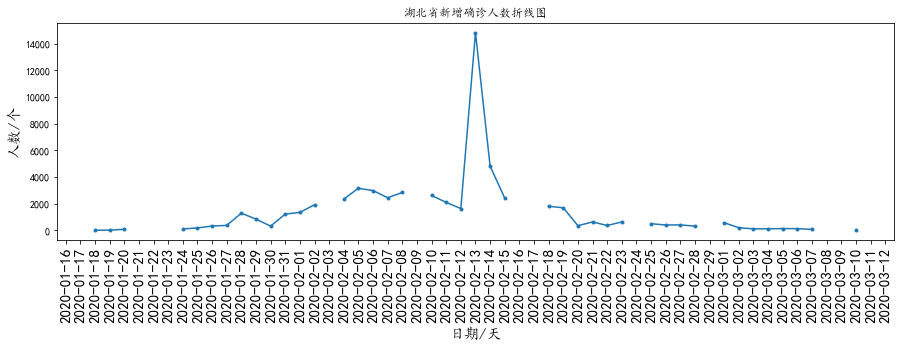

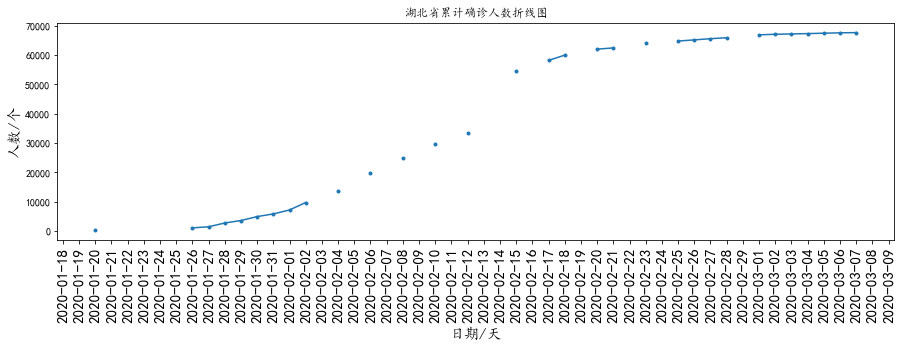

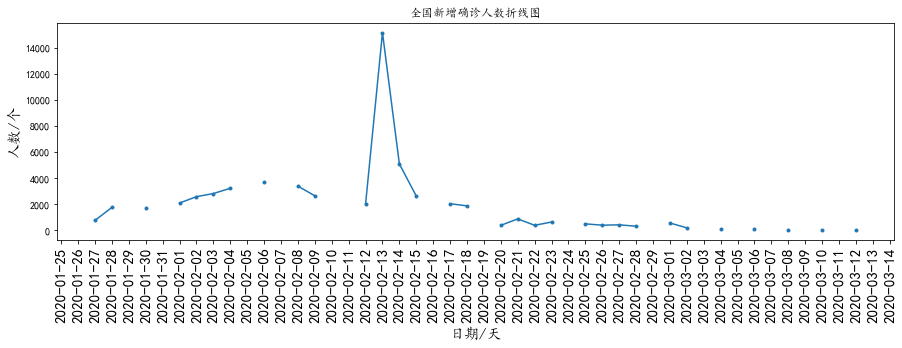

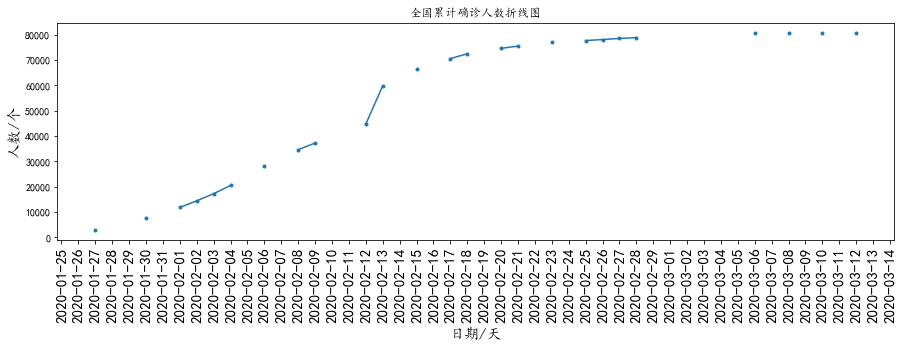

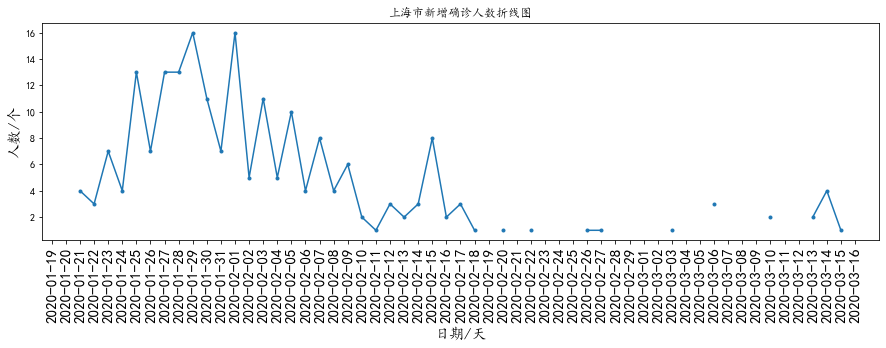

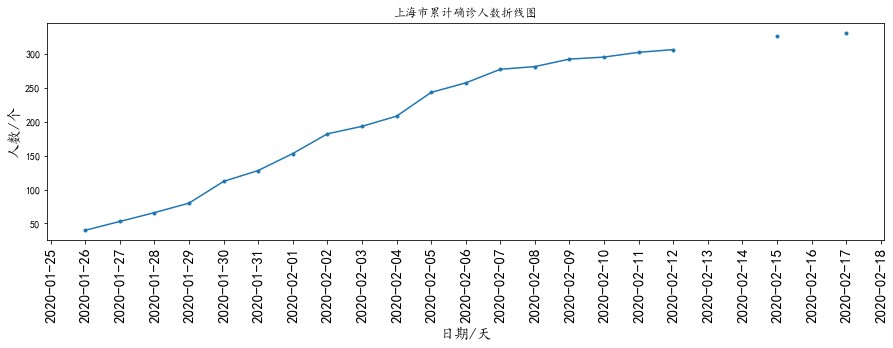

In [9]:
font_size = 15
plt.rcParams['font.sans-serif'] = ['KaiTi'] # 指定默认字体
plt.figure(figsize=(15, 4))
plt.plot(date, df['hubei_add'].to_numpy(), linestyle='-', marker='.')
plt.title('湖北省新增确诊人数折线图')
plt.xlabel('日期/天', fontsize=font_size)
plt.ylabel('人数/个', fontsize=font_size)
plt.xticks(rotation=90, fontsize=font_size)
plt.show()
plt.figure(figsize=(15, 4))
plt.plot(date, df['hubei_acc'].to_numpy(), linestyle='-', marker='.')
plt.title('湖北省累计确诊人数折线图')
plt.xlabel('日期/天', fontsize=font_size)
plt.ylabel('人数/个', fontsize=font_size)
plt.xticks(rotation=90, fontsize=font_size)
plt.show()
plt.figure(figsize=(15, 4))
plt.plot(date, df['nation_add'].to_numpy(), linestyle='-', marker='.')
plt.title('全国新增确诊人数折线图')
plt.xlabel('日期/天', fontsize=font_size)
plt.ylabel('人数/个', fontsize=font_size)
plt.xticks(rotation=90, fontsize=font_size)
plt.show()
plt.figure(figsize=(15, 4))
plt.plot(date, df['nation_acc'].to_numpy(), linestyle='-', marker='.')
plt.title('全国累计确诊人数折线图')
plt.xlabel('日期/天', fontsize=font_size)
plt.ylabel('人数/个', fontsize=font_size)
plt.xticks(rotation=90, fontsize=font_size)
plt.show()
plt.figure(figsize=(15, 4))
plt.plot(date, df['shanghai_add'].to_numpy(), linestyle='-', marker='.')
plt.title('上海市新增确诊人数折线图')
plt.xlabel('日期/天', fontsize=font_size)
plt.ylabel('人数/个', fontsize=font_size)
plt.xticks(rotation=90, fontsize=font_size)
plt.show()
plt.figure(figsize=(15, 4))
plt.plot(date, df['shanghai_acc'].to_numpy(), linestyle='-', marker='.')
plt.title('上海市累计确诊人数折线图')
plt.xlabel('日期/天', fontsize=font_size)
plt.ylabel('人数/个', fontsize=font_size)
plt.xticks(rotation=90, fontsize=font_size)
plt.show()